<a href="https://colab.research.google.com/github/BeebaaKhann/AI_Lab_Spam_Detection/blob/main/24267_Areeba_Khan_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("spam.csv",encoding =  'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


##### Most of the values are null in the last 3 columns so dropping

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### ham=0 and spam=1

In [ ]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#check for duplicates
df.duplicated().sum()

403

In [ ]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5169, 2)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset is imbalanced

In [ ]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def tokenize(x):
    doc=nlp(x)
    return len(doc)

In [ ]:
df['num_words']=df['text'].apply(tokenize)

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sents'] = df['text'].apply(lambda x: len(list(nlp(x).sents)))
df.head()

,target,text,num_characters,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,3
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.describe()

,target,num_characters,num_words,num_sents
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.339911,2.122848
std,0.332253,58.236293,13.175170,1.481111
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,2.000000
75%,0.000000,117.000000,26.000000,3.000000
max,1.000000,910.000000,196.000000,31.000000


In [ ]:
df.groupby('target').agg([np.mean,np.std,len,np.min,np.max])

<ipython-input-21-6fa64d262f41>:1: FutureWarning: ['text'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('target').agg([np.mean,np.std,len,np.min,np.max])


num_characters                             num_words                   \
                 mean        std   len amin amax       mean        std   len   
target                                                                         
0           70.459256  56.358207  4516    2  910  16.919176  13.224373  4516   
1          137.891271  30.137753   653   13  224  28.165391   7.361204   653   

                 num_sents                            
       amin amax      mean       std   len amin amax  
target                                                
0         1  196  1.982728  1.431233  4516    1   31  
1         2   49  3.091884  1.458257   653    1    8

In [ ]:
# Cleaning
from spacy.lang.en.stop_words import STOP_WORDS
import string
def transform_text(text):
    text = text.lower()
    text = [word.text for word in nlp(text)]
    y=[]
    for i in text:
        if i.isalnum() and (i not in STOP_WORDS) and (i not in string.punctuation):
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        for j in nlp(i):
            y.append(j.lemma_)
    return " ".join(y)

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,3,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf live


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
spam_corpus= []
for msg in df[df['target']== 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
# Model Building


from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
tf= TfidfVectorizer(max_features=3000)
X = tf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [ ]:
clfs = {'Naive Bayes': mnb, 'Logistics Regression': lrc, 'Decision Tree': dtc, }

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    score = clf.score(X_test, y_test)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, score, f1


In [ ]:
accuracy_scores = []
precision_scores = []
score_list = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_score, current_f1 = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    print("Score:", current_score)
    print("F1 Score:", current_f1)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    score_list.append(current_score)


For NB
Accuracy: 0.9777562862669246
Precision: 0.990909090909091
Score: 0.9777562862669246
F1 Score: 0.9045643153526971
For DT
Accuracy: 0.9294003868471954
Precision: 0.8222222222222222
Score: 0.9294003868471954
F1 Score: 0.6696832579185521
For LR
Accuracy: 0.9545454545454546
Precision: 0.9468085106382979
Score: 0.9545454545454546
F1 Score: 0.7911111111111111


In [ ]:
dataFr = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy': accuracy_scores,'Precision': precision_scores,'Score': score_list}).sort_values('Precision', ascending=False)
dataFr


,Algorithm,Accuracy,Precision,Score
0,NB,0.977756,0.990909,0.977756
2,LR,0.954545,0.946809,0.954545
1,DT,0.929400,0.822222,0.929400


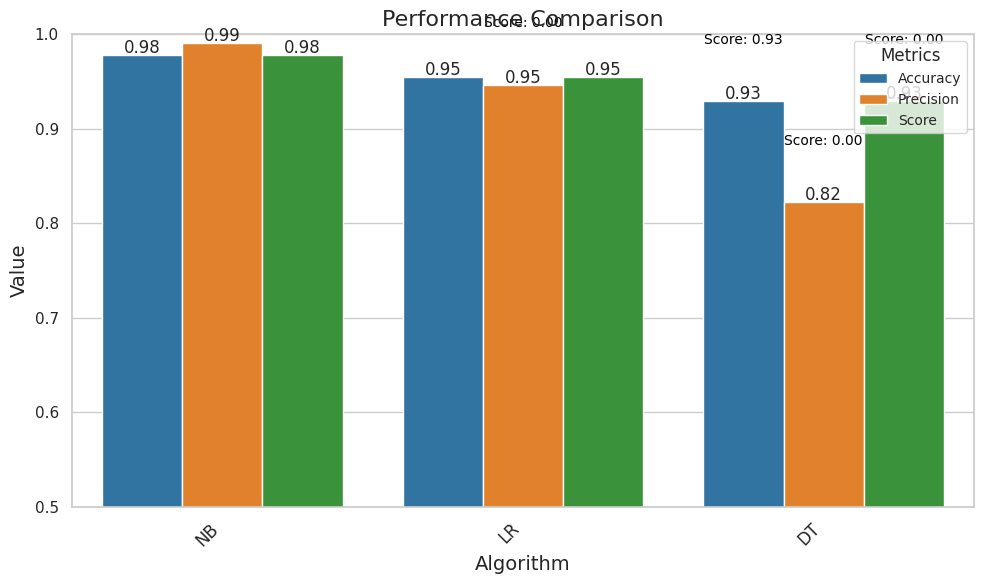

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Plotting the data
performance_df1 = pd.melt(temp_df, id_vars="Algorithm")
sns.set(style="whitegrid", palette=colors)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Algorithm', y='value', hue='variable', data=performance_df1)

# Set the plot limits and labels
plt.ylim(0.5, 1.0)  # Set the y-axis limit from 0.5 to 1.0
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Performance Comparison', fontsize=16)

# Add a legend and adjust the positioning
plt.legend(title='Metrics', title_fontsize='12', fontsize='10')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

# Add scores to the plot
for i, p in enumerate(ax.patches):
    score = temp_df['Score'].iloc[i] if i < len(temp_df) else 0
    ax.annotate(f'Score: {score:.2f}', (p.get_x() + p.get_width() / 2., p.get_height() + 0.05),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

# Display the plot
plt.show()
